In [36]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter

In [37]:
def filter(sr: int, data: np.array, cutoff: int, order: int) -> np.array:
    b, a = butter(order, cutoff, btype='low', analog=False, output='ba', fs=2*sr)
    y = lfilter(b, a, data)
    return y

In [66]:
audio_1 = "output1.wav"
audio_2 = "output2.wav"
audio_3 = "output3.wav"

In [67]:
signal1, sr1 = librosa.load(audio_1)
signal2, sr2 = librosa.load(audio_2)
signal3, sr3 = librosa.load(audio_3)
signal1_f = filter(sr1, signal1, 500, 1)
signal2_f = filter(sr2, signal2, 500, 1)
signal3_f = filter(sr3, signal3, 500, 1)

In [68]:
mfccs1 = librosa.feature.mfcc(y=signal1_f, n_mfcc=13, sr=sr1)
mfccs2 = librosa.feature.mfcc(y=signal2_f, n_mfcc=13, sr=sr2)
mfccs3 = librosa.feature.mfcc(y=signal3_f, n_mfcc=13, sr=sr3)

[Text(0.5, 1.0, 'log Power spectrogram')]

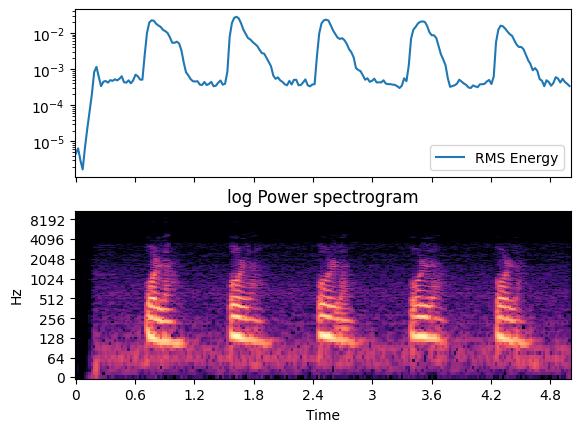

In [156]:
S1, phase1 = librosa.magphase(librosa.stft(signal1_f))
rms1 = librosa.feature.rms(S=S1)
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms1)
ax[0].semilogy(times, rms1[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S1, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

[Text(0.5, 1.0, 'log Power spectrogram')]

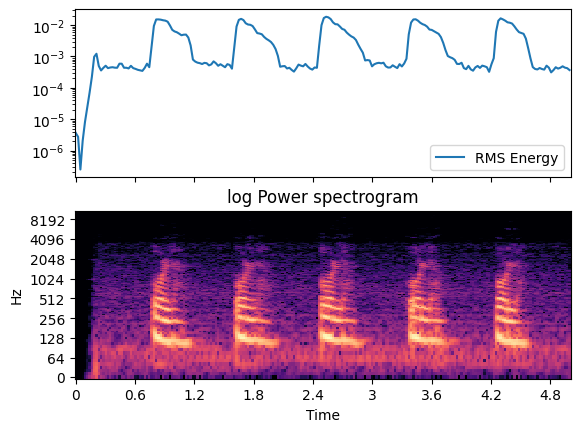

In [157]:
S2, phase2 = librosa.magphase(librosa.stft(signal2_f))
rms2 = librosa.feature.rms(S=S2)
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms2)
ax[0].semilogy(times, rms2[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S2, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

[Text(0.5, 1.0, 'log Power spectrogram')]

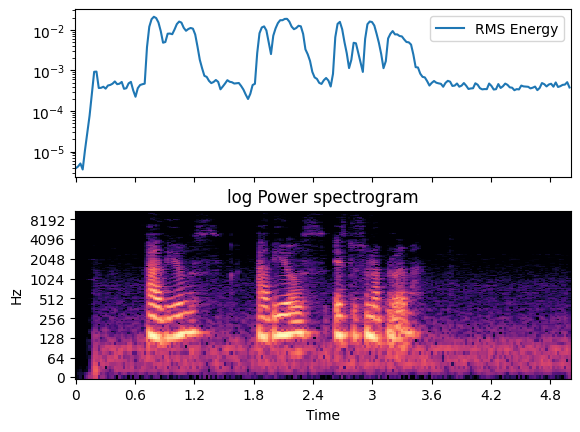

In [158]:
S3, phase = librosa.magphase(librosa.stft(signal3_f))
rms3 = librosa.feature.rms(S=S3)
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms3)
ax[0].semilogy(times, rms3[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S3, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

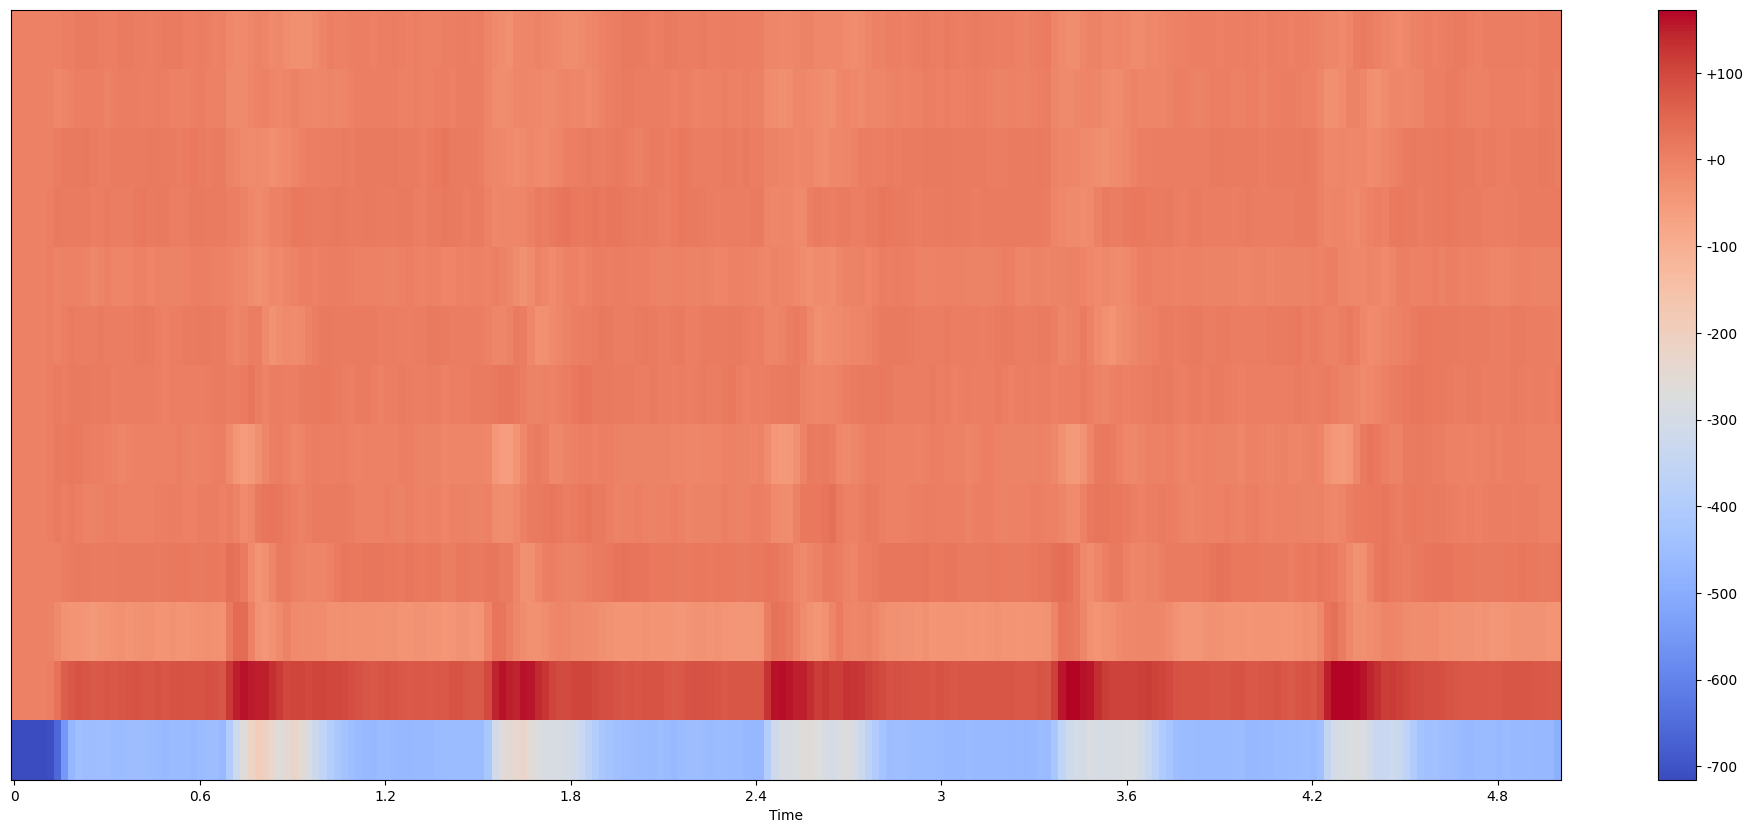

In [39]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs1, 
                         x_axis="time", 
                         sr=sr1)
plt.colorbar(format="%+2.f")
plt.show()

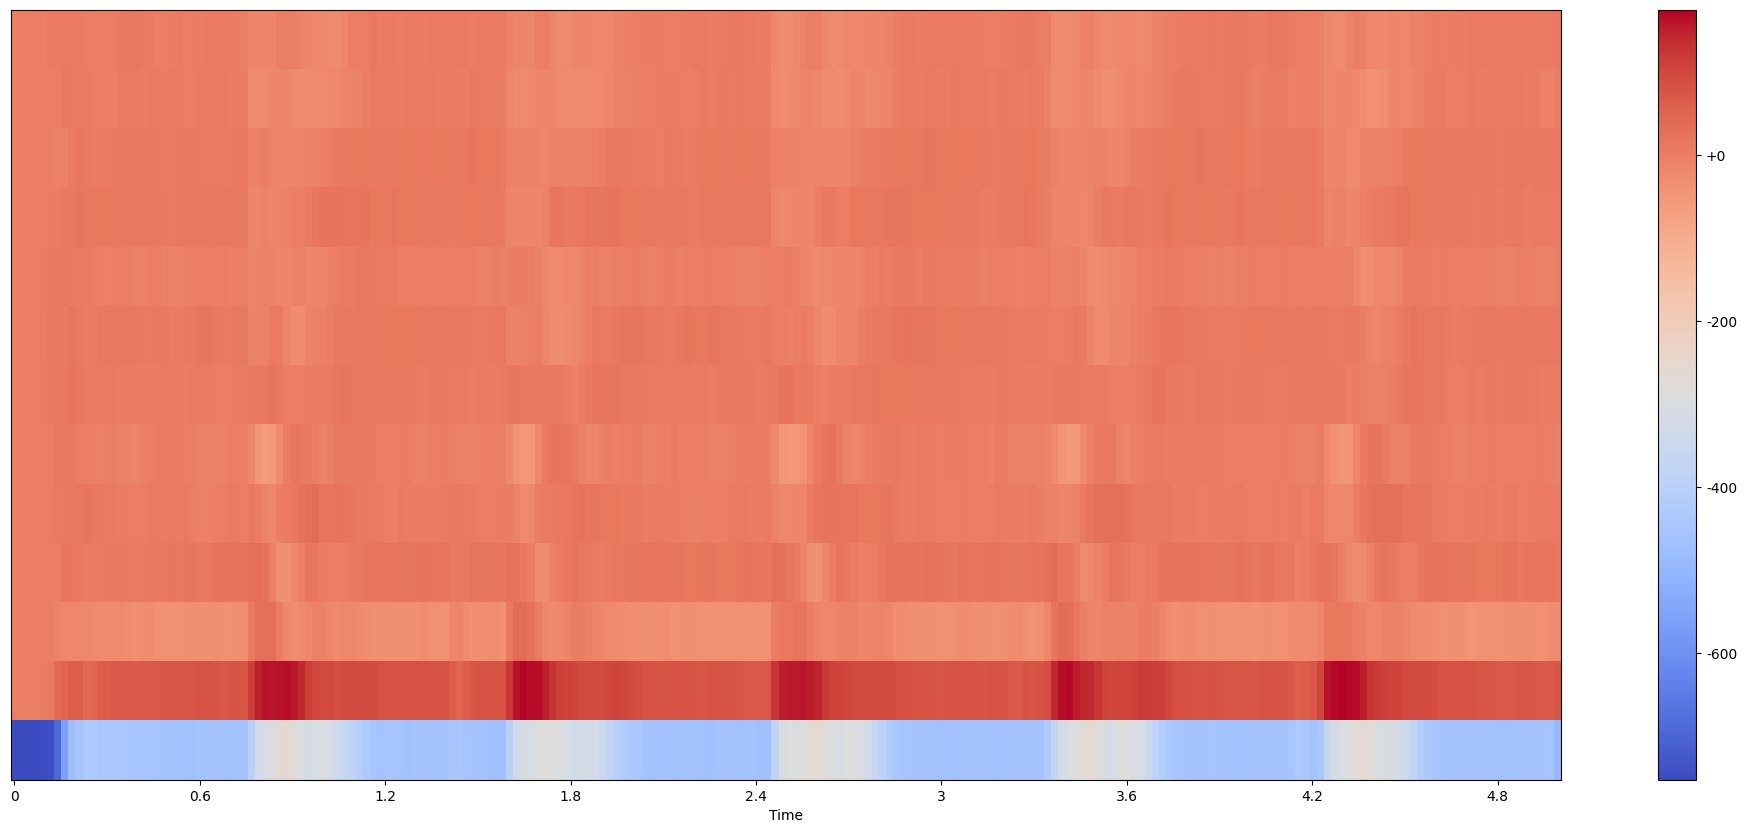

In [40]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs2, 
                         x_axis="time", 
                         sr=sr2)
plt.colorbar(format="%+2.f")
plt.show()

[Text(0.5, 1.0, 'log Power spectrogram')]

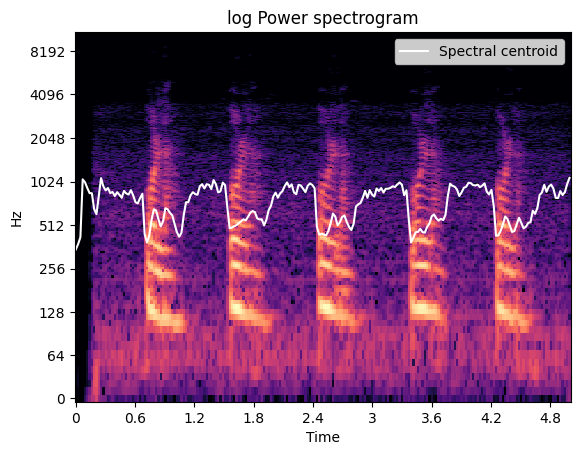

In [127]:
cent1 = librosa.feature.spectral_centroid(S=S1)

times = librosa.times_like(cent1)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S1, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent1.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

[Text(0.5, 1.0, 'log Power spectrogram')]

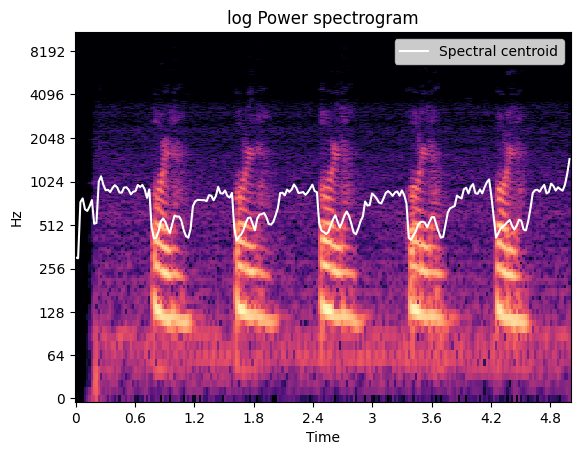

In [128]:
cent2 = librosa.feature.spectral_centroid(S=S2)

times = librosa.times_like(cent2)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S2, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent2.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

[Text(0.5, 1.0, 'log Power spectrogram')]

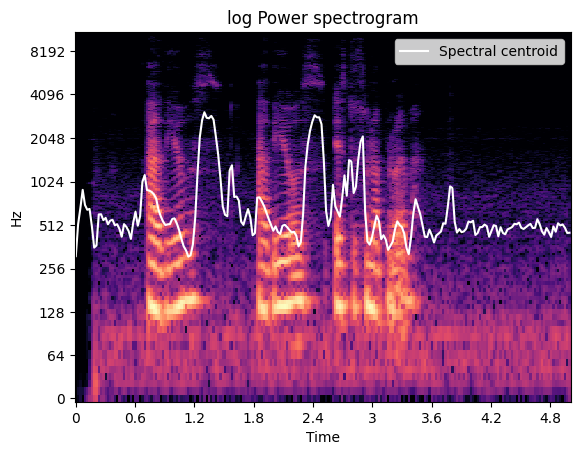

In [106]:
cent3 = librosa.feature.spectral_centroid(S=S3)

times = librosa.times_like(cent3)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S3, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent3.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

In [74]:
v3 = (rms1[0]-rms2[0])**2
sum(v3)<0.01

True

In [134]:
rms1[0].shape

(216,)

In [132]:
(cent1@cent2.T)/(np.linalg.norm(cent1)*np.linalg.norm(cent2))

array([[0.98179801]])

In [159]:
x = (np.dot(rms1[0],rms2[0]))/(np.linalg.norm(rms1[0])*np.linalg.norm(rms2[0]))
y = (np.dot(rms1[0],rms3[0]))/(np.linalg.norm(rms1[0])*np.linalg.norm(rms3[0]))
print(x,y)

0.8596237302037152 0.3411793434471445


In [150]:
x

0.8596237302037152